DS- Assignment 2
=======================
<br>

<center>JIANPING ZHOU</center>

<center> 01/03/2021 </center>
<br>

1
---------

Get 1-day trading data (open, close, high, low and volume) with 1 minute interval for Therma Bright Inc. (THRM.V).   
Plot candle stick plot and VWAP in one figure using the 1-day data above.  [20 points]
(10 points for candle stick plot and 10 points for VWAP)


In [ ]:
pip install mpl_finance

In [121]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import finplot as fplt
import matplotlib.pyplot as plt
import mpl_finance
from sklearn import decomposition
import time
from scipy.stats import pearsonr

In [102]:
DF = yf.download('THRM.V',period = "1d",interval='1m')
DF['vwap'] = (np.cumsum(DF['Volume'] * DF['Adj Close']) / np.cumsum(DF['Volume']))
DF.reset_index(inplace = True)
DF['Date']=DF['Datetime']
for i in range(len(DF['Date'])):
    DF['Date'][i]=time.mktime(DF['Datetime'][i].timetuple())
DF


[*********************100%***********************]  1 of 1 completed


D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Datetime,Open,High,Low,Close,Adj Close,Volume,vwap,Date
0,2021-01-29 09:30:00-05:00,0.54,0.54,0.53,0.53,0.53,0,NaN,1.61193e+09
1,2021-01-29 09:34:00-05:00,0.52,0.52,0.52,0.52,0.52,15550,0.520000,1.61193e+09
2,2021-01-29 09:36:00-05:00,0.53,0.53,0.53,0.53,0.53,2500,0.521385,1.61193e+09
3,2021-01-29 09:37:00-05:00,0.53,0.53,0.53,0.53,0.53,1000,0.521837,1.61193e+09
4,2021-01-29 09:38:00-05:00,0.53,0.53,0.53,0.53,0.53,157000,0.529117,1.61193e+09
...,...,...,...,...,...,...,...,...,...
173,2021-01-29 15:55:00-05:00,0.53,0.53,0.52,0.52,0.52,1200,0.521474,1.61195e+09
174,2021-01-29 15:56:00-05:00,0.52,0.52,0.52,0.52,0.52,56500,0.521451,1.61195e+09
175,2021-01-29 15:57:00-05:00,0.52,0.53,0.52,0.52,0.52,46000,0.521433,1.61195e+09
176,2021-01-29 15:58:00-05:00,0.52,0.52,0.52,0.52,0.52,6000,0.521431,1.61195e+09


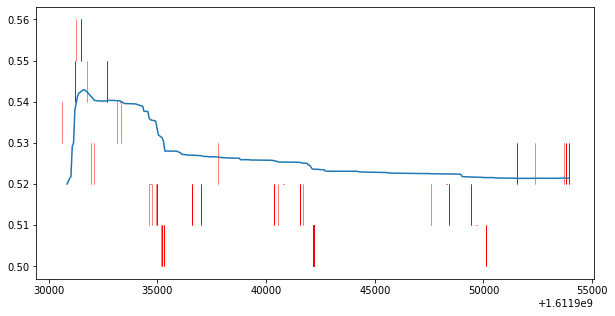

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=DF[['Date', 'Open', 'High', 'High', 'Low']].values,
    width=0.7,
    colorup='r',
    colordown='g')
plt.plot(DF['Date'],DF['vwap'])


2.Get daily trading data (open, close, high, low and volume) from 2018-01-01 to 2020-12-31 for Therma Bright Inc. (THRM.V).  
---------
Plot candle stick plot and 30-day and 100-day exponential moving averages on one figure. [20 points]
(10 points for candle stick plot and 10 points for moving averages)


In [115]:
DF = yf.download('THRM.V',start="2018-01-01", end="2020-12-31",interval='1d')
DF.reset_index(inplace = True)
DF['Date1']=DF['Date']
for i in range(len(DF['Date1'])):
    DF['Date1'][i]=time.mktime(DF['Date'][i].timetuple())
DF['30'] = DF['Adj Close'].ewm(span=30, adjust=False).mean()
DF['100'] = DF['Adj Close'].ewm(span=100, adjust=False).mean()
DF

[*********************100%***********************]  1 of 1 completed


D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Open,High,Low,Close,Adj Close,Volume,Date1,30,100
0,2018-01-02,0.080,0.085,0.075,0.075,0.075,159666,1.51487e+09,0.075000,0.075000
1,2018-01-03,0.080,0.080,0.070,0.075,0.075,718160,1.51496e+09,0.075000,0.075000
2,2018-01-04,0.070,0.075,0.065,0.070,0.070,693152,1.51504e+09,0.074677,0.074901
3,2018-01-05,0.070,0.070,0.065,0.065,0.065,474965,1.51513e+09,0.074053,0.074705
4,2018-01-08,0.065,0.080,0.065,0.080,0.080,1068350,1.51539e+09,0.074437,0.074810
...,...,...,...,...,...,...,...,...,...,...
747,2020-12-22,0.210,0.230,0.195,0.215,0.215,2986435,1.60861e+09,0.153648,0.123961
748,2020-12-23,0.210,0.215,0.200,0.210,0.210,1138245,1.6087e+09,0.157284,0.125665
749,2020-12-24,0.220,0.230,0.210,0.225,0.225,2114075,1.60879e+09,0.161653,0.127632
750,2020-12-29,0.235,0.235,0.205,0.225,0.225,5004639,1.60922e+09,0.165740,0.129560


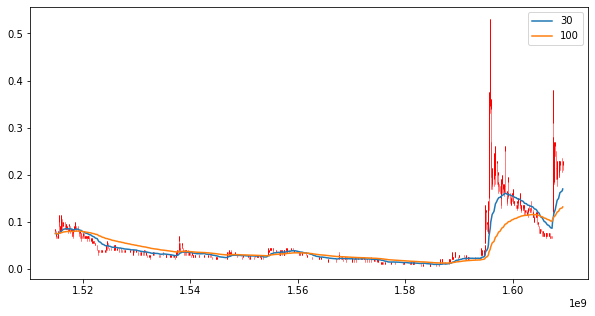

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=DF[['Date1', 'Open', 'High', 'High', 'Low']].values,
    width=0.7,
    colorup='r',
    colordown='g')
for ma in ['30','100']:
    plt.plot(DF['Date1'], DF[ma], label=ma)
plt.legend()

3.Use the same data in Question 2.
---------
(1) Calculate daily return (return = log(today close/previous close)) [5 points]
(2) Conduct the hypothesis testing to check if the distribution of daily return is normal.  [15 points]


In [118]:
DF['logreturn']=np.log(DF['Adj Close'] / DF['Adj Close'].shift(1))

In [136]:
import scipy 
k2, p=scipy.stats.normaltest (DF['logreturn'].dropna(), axis=0)
print("p = {:g}".format(p))

p = 3.17996e-61


it can be find reject the null hypothesis :the sample comes from a normal distribution. So the log return is not normal.

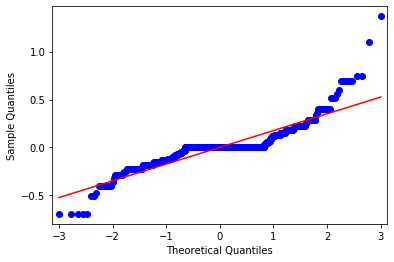

In [137]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(DF['logreturn'].dropna(),line='s')
pyplot.show()

From the qqplot we know log return has fat tails.

4.Take 10 stocks in S&P500 and collect daily close price from 2020-06-01 to 2020-12-31 for selected stocks.
---------
(1)	) Calculate daily return (return = log(today close/previous close)) for each of 10 stocks [5 points]
(2)	Run PCA on calculated daily return and find the first principal component. [15 points]
(3)	Plot first principal component and daily return of S&P500 in one figure[10 points]
(4)	Calculate the correlation coefficient between first principal component and daily return of S&P500 index. [10 points]


In [3]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
SP500_NAME=table[0]['Symbol']
Names=SP500_NAME.head(10).tolist()
Names

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES']

In [4]:
DF = yf.download(Names, start="2020-06-01", end="2020-12-31",interval='1d')['Adj Close'].dropna()

[*********************100%***********************]  10 of 10 completed


In [11]:
for i in range(len(Names)):
    DF[Names[i]+'log return']=np.log(DF[Names[i]] / DF[Names[i]].shift(1))

In [71]:
DFreturn=DF.drop(columns=Names)
DFreturn=DFreturn.dropna()
pca = decomposition.PCA()
pca.fit(DFreturn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

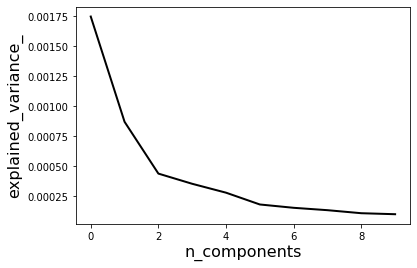

In [23]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(pca.explained_variance_, 'k', linewidth=2)
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained_variance_', fontsize=16)
plt.show()

From the plot I will choice no more than 4 components,the performance reduce sharp for the firth component. So, I prefer choice first 4 components.  

In [34]:
#From the plot I will choice no more than 4 components,the performance reduce sharp for the firth component. So, I prefer choice first 4 components. 
pca_4 = decomposition.PCA(n_components=4)
pca_4.fit(DFreturn)
#Each component performance
print(pca_4.explained_variance_ratio_)
#First four components can explain 78.22% variance
sum(pca_4.explained_variance_ratio_)

[0.40127387 0.19965176 0.10044539 0.08092054]


0.7822915465818003

In [68]:
pca_1 = decomposition.PCA(n_components=1)
pca_1.fit(DFreturn)
X_1 = pca_1.transform(DFreturn)
#First component
X_1

array([[-0.0106072 ],
       [ 0.0086536 ],
       [ 0.02212661],
       [-0.04976117],
       [-0.02610842],
       [-0.00592518],
       [-0.02561984],
       [ 0.17518011],
       [-0.05345977],
       [-0.02281404],
       [-0.03117844],
       [-0.02221317],
       [ 0.00927764],
       [-0.00602603],
       [-0.01974409],
       [ 0.00907227],
       [ 0.08474079],
       [-0.02519568],
       [ 0.05711432],
       [-0.00444567],
       [-0.04997908],
       [-0.02556153],
       [-0.0076315 ],
       [-0.02489568],
       [ 0.02807036],
       [-0.01785971],
       [-0.03725177],
       [ 0.01179652],
       [ 0.06592506],
       [-0.02623942],
       [-0.03191839],
       [ 0.022701  ],
       [-0.03047402],
       [-0.05390469],
       [ 0.01414123],
       [-0.05789708],
       [ 0.05130234],
       [-0.0806427 ],
       [-0.01422032],
       [ 0.03998729],
       [-0.09629315],
       [-0.01248967],
       [ 0.01000855],
       [-0.02265387],
       [-0.05418747],
       [-0

In [86]:
SP500 = yf.download('^GSPC', start="2020-06-01", end="2020-12-31",interval='1d').dropna()
SP500['SP500 logreturn']=np.log(SP500['Adj Close'] / SP500['Adj Close'].shift(1))
SP500=SP500.dropna()
SP500['1st component']=X_1
SP500.reset_index(inplace = True)

[*********************100%***********************]  1 of 1 completed


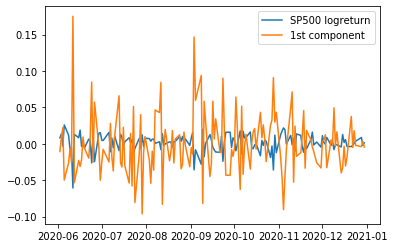

In [87]:
# Plot first principal component and daily return of S&P500 in one figure
for ma in ['SP500 logreturn','1st component']:
    plt.plot(SP500['Date'], SP500[ma], label=ma)
plt.legend()

In [93]:
np.corrcoef(SP500['SP500 logreturn'], SP500['1st component'])

array([[ 1.        , -0.76866383],
       [-0.76866383,  1.        ]])

In [94]:
pccs = pearsonr(SP500['SP500 logreturn'], SP500['1st component'])
pccs

(-0.7686638260674221, 3.973377374805572e-30)

From the result we can find the first component has strong negative correlation with the S&P500. So, the first component can be seen as an opposite indicator for the market

5.Pick 2 companies in the same industry, collect close, open, high and low for each company from 2020-06 to 2020-12.    
---------
Variable set 1 = company A’s close, open, high and low
---------
Variable set 2 = company B’s close, open, high and low  
---------
---------
(1)	Run canonical analysis using data stated above
(2)	Give some conclusion or findings from your analysis


In [2]:
TOT = yf.download('TOT', start="2020-06-01", end="2020-12-31",interval='1d').dropna()
XOM = yf.download('XOM', start="2020-06-01", end="2020-12-31",interval='1d').dropna()
TOT.reset_index(inplace = True)
XOM.reset_index(inplace = True)
TOT['Datetime']=TOT['Date']
XOM['Datetime']=XOM['Date']
for i in range(len(TOT['Date'])):
    TOT['Datetime'][i]=time.mktime(TOT['Date'][i].timetuple())
for i in range(len(TOT['Date'])):
    XOM['Datetime'][i]=time.mktime(XOM['Date'][i].timetuple())    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


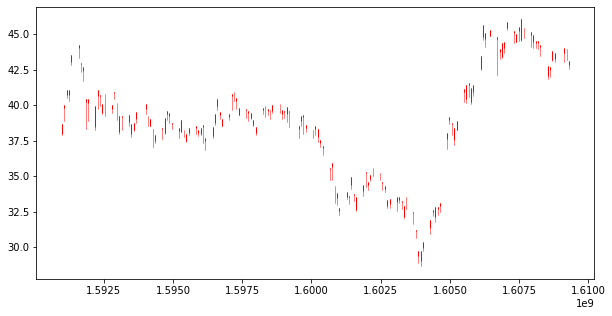

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=TOT[['Datetime', 'Open', 'High', 'High', 'Low']].values,
    width=0.7,
    colorup='r',
    colordown='g')
fig.show()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


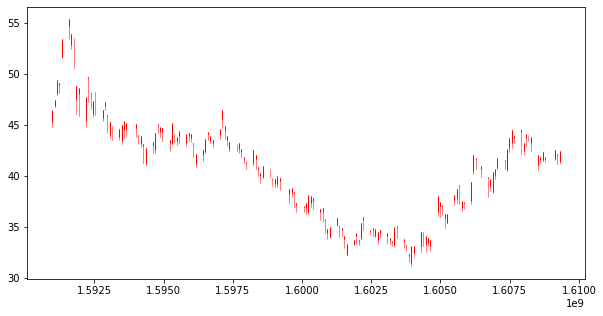

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
mpl_finance.candlestick_ochl(
    ax=ax,
    quotes=XOM[['Datetime', 'Open', 'High', 'High', 'Low']].values,
    width=0.7,
    colorup='r',
    colordown='g')
fig.show()

In [46]:
TOT['logreturn TOT']=np.log(TOT['Adj Close'] / TOT['Adj Close'].shift(1))
XOM['logreturn XOM']=np.log(XOM['Adj Close'] / XOM['Adj Close'].shift(1))
pccs = pearsonr(TOT['logreturn TOT'].dropna(), XOM['logreturn XOM'].dropna())
pccs

(0.8265107369341083, 2.922424833803911e-38)

In [10]:
#from the correlation test, we can find the log return for thoes two companys has highly linear relation.